### Random Sample Imputation

__AIM__: __Random Sample Imputation__ consists of taking random observations from the dataset and we use this observation to replace the NaN Values.

When to Use?: 
It assumes that the data are missing completely at random..

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# df = pd.read_csv("Datasets/titanic_train.csv", usecols=['Age', "Fare", "Survived"])
df = pd.read_csv("Datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0).head()

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
Name: Age, dtype: float64

In [7]:
def impute_NaN(df, variable, mode_of_ops):
    if mode_of_ops == 'median':
        df[variable+"_{}".format(mode_of_ops)] = df[variable].fillna(df[variable].median())
        
    elif mode_of_ops == 'mean':
        df[variable+"_{}".format(mode_of_ops)] = df[variable].fillna(df[variable].mean())
        
    elif mode_of_ops == 'random':
        df[variable+"_random"] = df[variable]
        random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
        random_sample.index = df[df[variable].isnull()].index
        df.loc[df[variable].isnull(), variable+"_random"] = random_sample
        
    else:
        df[variable+"_{}".format(mode_of_ops)] = df[variable].fillna(df[variable].mode())
    return df

In [8]:
df1 = impute_NaN(df, variable='Age', mode_of_ops='median')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [9]:
df1 = impute_NaN(df, variable='Age', mode_of_ops='random')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [10]:
df1 = impute_NaN(df, variable='Age', mode_of_ops='mean')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


In [11]:
df[['Age', "Age_median", "Age_random"]].head(100).tail(10)

,Age,Age_median,Age_random
90,29.0,29.0,29.0
91,20.0,20.0,20.0
92,46.0,46.0,46.0
93,26.0,26.0,26.0
94,59.0,59.0,59.0
95,NaN,28.0,40.0
96,71.0,71.0,71.0
97,23.0,23.0,23.0
98,34.0,34.0,34.0
99,34.0,34.0,34.0


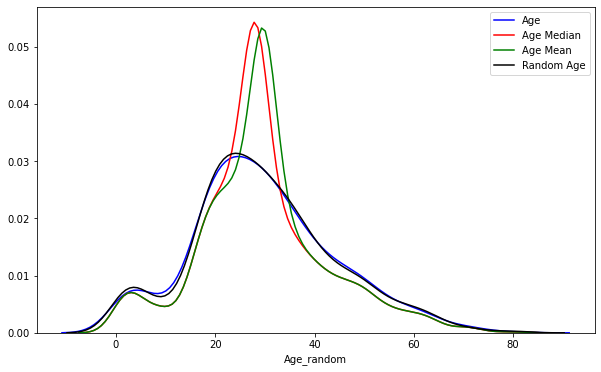

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(df.Age, color='b', hist=False, label = 'Age')
sns.distplot(df.Age_median, color='r', hist=False, label = 'Age Median')
sns.distplot(df.Age_mean, color='g', hist=False, label = 'Age Mean')
sns.distplot(df.Age_random, color='black', hist=False, label='Random Age')
plt.legend(loc='best')
plt.show()

### Advantages and Disadvantages of Random Sample Imputation

#### Advantages:
1. easy to implement.
2. There is less distortion in variance

#### Disadvantages:
1. Every situation randomness wont work.

### Capturing NaN values with a new feature

It works well When we have data not missing completely at Random

In [13]:
df = pd.read_csv("Datasets/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df["Age_NaN"] = np.where(df.Age.isnull(), 1, 0)
df[['Age', 'Age_NaN']].head(100).tail(10)

,Age,Age_NaN
90,29.0,0
91,20.0,0
92,46.0,0
93,26.0,0
94,59.0,0
95,NaN,1
96,71.0,0
97,23.0,0
98,34.0,0
99,34.0,0


In [15]:
df = impute_NaN(df, variable='Age', mode_of_ops='median')
df.head(100).tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NaN,Age_median
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S,0,29.0
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,0,20.0
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,0,46.0
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S,0,26.0
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,0,59.0
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,1,28.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,71.0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,23.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,0,34.0
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S,0,34.0


### Advantages and Disantages
#### Advantages:
1. Easy to Implement
2. Captures the Importance of Missing Values

#### Disadvantages:
1. Creating Additional Features causing Curse of Dimetionality.

### End of Distribution Imputation

In [16]:
df = pd.read_csv("Datasets/titanic_train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


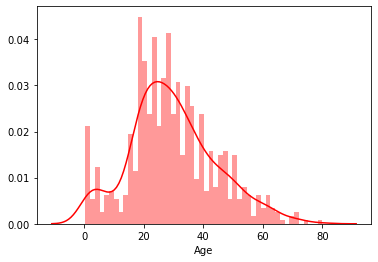

In [17]:
sns.distplot(df.Age, color='r', bins=50)

In [18]:
extreme = df.Age.mean()+3 * df.Age.std()
extreme

73.27860964406095

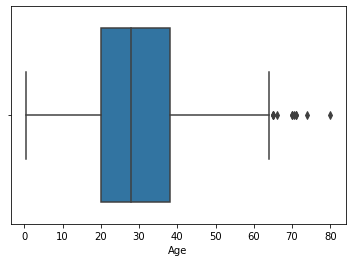

In [19]:
sns.boxplot(df.Age)

In [20]:
def impute_NaN(df, variable, mode_of_ops, extreme):
    df[variable+"_end_distribution"] = df[variable]
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    
    if mode_of_ops == 'median':
        df[variable] = df[variable].fillna(df[variable].median())
        
    elif mode_of_ops == 'mean':
        df[variable] = df[variable].fillna(df[variable].mean())
        
    elif mode_of_ops == 'random':
        random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
        random_sample.index = df[df[variable].isnull()].index
        df.loc[df[variable].isnull(), variable] = random_sample
    else: 
        df[variable] = df[variable].fillna(df[variable].mode())
    return df

In [21]:
df = impute_NaN(df, "Age", 'median', extreme)
df.head(100).tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_end_distribution
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S,29.00000
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,20.00000
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S,46.00000
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S,26.00000
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,59.00000
95,96,0,3,"Shorney, Mr. Charles Joseph",male,28.0,0,0,374910,8.0500,NaN,S,73.27861
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,71.00000
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,23.00000
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,34.00000
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S,34.00000


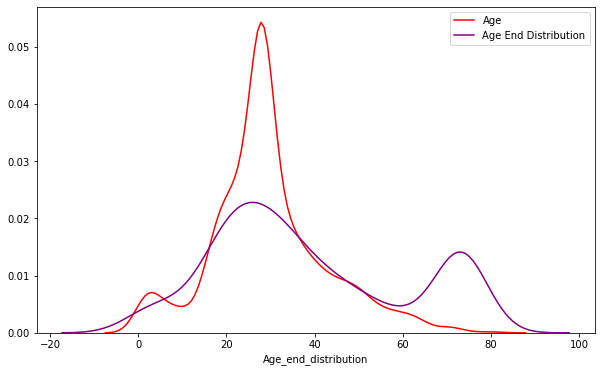

In [22]:
plt.figure(figsize=(10, 6))
sns.distplot(df.Age, color='r', hist=False, label="Age")
sns.distplot(df.Age_end_distribution, color='purple', hist=False, label="Age End Distribution")
plt.legend()
plt.show()

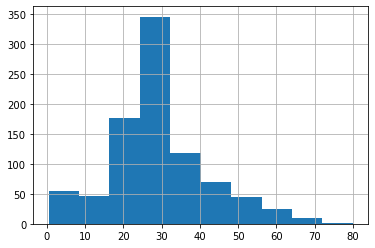

In [23]:
df.Age.hist()

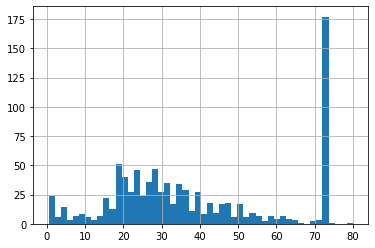

In [24]:
df.Age_end_distribution.hist(bins=50)

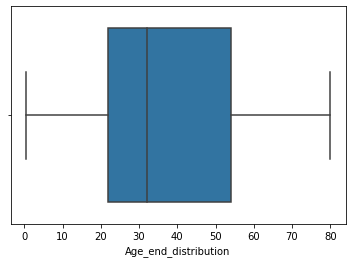

In [25]:
sns.boxplot(df.Age_end_distribution)